In [5]:
import skimage
import scipy.misc
import numpy as np
import skimage.color
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
def get_img(img_path):
    img = scipy.misc.imread(img_path, mode = 'RGB')
    return img

def rgb2lab(image):
    '''
    L range: 0 ~ 100
    a range: -128 ~ 127
    b range: -128 ~ 127
    
    '''
    lab_color = skimage.color.rgb2lab(image)
    return lab_color


def lab2rgb(image):
    rgb_color = skimage.color.lab2rgb(image)
    return rgb_color


def nearest_search(image, palette):
    '''
    Palette shape: (16, 16, 3)
    
    '''
    img_shape = image.shape
    height = img_shape[0] 
    width = img_shape[1] 
    new_img = np.zeros(img_shape)
    for i in range(height):
        for j in range(width):
            #index = find_min_idx(np.sum((palette - image[i, j, :])**2,2)) ### Bugs
            index = find_min_idx(np.sum(np.absolute(palette - image[i, j, :]),2))
            new_img[i, j, :] = palette[index[0], index[1], :]
    
    return new_img

def nearest_search_lab(ab_color, palette):
    '''
    search in Lab space
    
    '''
    ab_color_shape = ab_color.shape
    height = ab_color_shape[0] 
    width = ab_color_shape[1] 
    new_color_space = np.zeros(ab_color_shape)
    for i in range(height):
        for j in range(width):
            index = find_min_idx(np.sum(np.absolute(palette - ab_color[i, j, :]),2)) ### Bugs 减法有问题
            #index = find_min_idx(np.sum((palette - ab_color[i, j, :]),2))
            new_color_space[i, j, :] = palette[index[0], index[1], :]
    
    return new_color_space


def find_min_idx(x):
    k = x.argmin()
    ncol = x.shape[1]
    return np.int(k/ncol), k%ncol

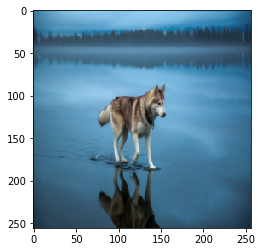

In [8]:
'''

Image loading and image resizing


'''
img = get_img('C:\\Users\\Orion_Peng\\Pictures\\Saved Pictures\\dog.jpg')
resize = scipy.misc.imresize(img, (256, 256))
plt.imshow(resize)
#img_reshape = np.reshape(resize,(64 * 64, 3))
#palette = img[100:116, 100:116, :]

In [10]:
resize.shape

(256, 256, 3)

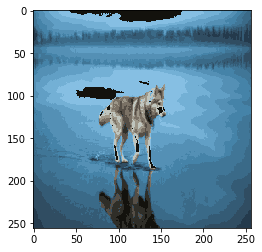

In [16]:
'''

K-means/RGB SPACE


'''
rgb_reshape = np.reshape(resize,(256 * 256, 3))
kmeans = KMeans(n_clusters=16, random_state=0).fit(rgb_reshape)
palette = kmeans.cluster_centers_
palette = np.reshape(palette,(4,4,3)).astype(np.uint8)
new = nearest_search(resize, palette)
plt.imshow(new.astype(np.uint8))

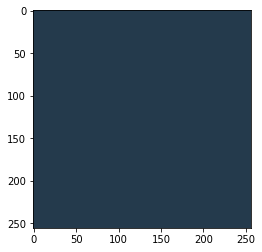

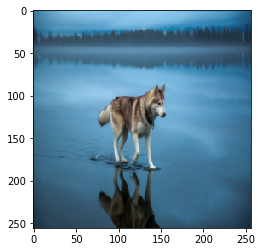

In [14]:
'''

Kmeans/Lab Space


'''
resize_lab = rgb2lab(resize)

ab_reshape = np.reshape(resize_lab,(256 * 256, 3))

kmeans = KMeans(n_clusters=16, random_state=0).fit(ab_reshape)
palette = kmeans.cluster_centers_
palette = np.reshape(palette,(4,4,3))

new = nearest_search_lab(resize_lab, palette)

new = lab2rgb(new)
plt.figure()
plt.imshow(new)
plt.figure()
plt.imshow(resize)

In [77]:
new = (new * 255).astype(np.uint8)
new_ = np.sum(new, axis = 2)
new_

array([[345, 345, 345, ..., 265, 265, 265],
       [345, 345, 345, ..., 265, 265, 265],
       [345, 345, 345, ..., 265, 265, 265],
       ..., 
       [170, 170, 170, ..., 170, 170, 170],
       [170, 170, 170, ..., 170, 170, 170],
       [170, 170, 170, ..., 170, 170, 170]], dtype=uint32)

In [79]:
unique, counts = np.unique(new_, return_counts=True)
dict(zip(unique, counts))

{52: 1557,
 127: 1284,
 170: 2570,
 216: 1012,
 226: 6520,
 265: 5749,
 304: 11400,
 314: 913,
 345: 7495,
 355: 2920,
 394: 6256,
 425: 841,
 439: 6775,
 495: 5250,
 548: 4441,
 560: 553}

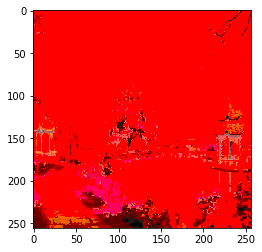

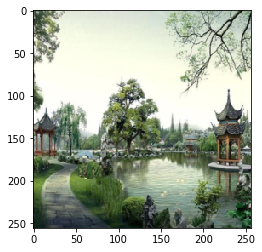

In [70]:
'''

Codebook generation: Pre-defined color palette

'''
import json
data = json.load(open('D:\\PythonScript\\Comp5422\\colordata.json'))
palette = np.zeros((256, 1, 3))
for i in range(256):
    palette[i,:,0] = data[i]['rgb']['r']
    palette[i,:,1] = data[i]['rgb']['g']
    palette[i,:,2] = data[i]['rgb']['b']

palette = np.reshape(palette,(16, 16, 3)).astype(np.uint8)
palette = rgb2lab(palette)
new = nearest_search(resize, palette)

new = lab2rgb(new)
plt.figure()
plt.imshow(new)
plt.figure()
plt.imshow(resize)

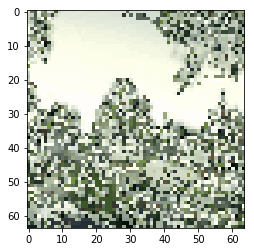

In [67]:
'''

Codebook generation: LBG Algorithm

'''

import lbg
cb, cb_abs_w, cb_rel_w = lbg.generate_codebook(img_reshape, 64)
palette = np.reshape(cb,(8,8,3)).astype(np.uint8)
new = nearest_search(resize, palette)
plt.imshow(new.astype(np.uint8))

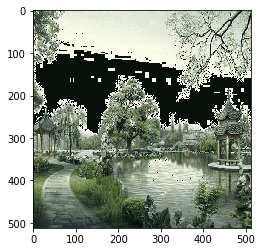

In [69]:
new = nearest_search_l1(img, palette)
plt.imshow(new.astype(np.uint8))